In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics
from imblearn.over_sampling import SMOTE
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_rows = 200

In [3]:
data = pd.read_csv('risk_factors_cervical_cancer.csv' , usecols=['Age', 'Number of sexual partners', 'First sexual intercourse',
                          'Num of pregnancies',  'Smokes',  'Smokes (years)',  'Smokes (packs/year)',  'Hormonal Contraceptives',
                          'Hormonal Contraceptives (years)',  'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
                          'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
                          'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum',
                          'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
                          'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Biopsy'])
data = data.replace('?' , np.nan)

In [4]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,0,0,0,NaN,NaN,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,0,0,0,NaN,NaN,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0,0,...,0,0,0,NaN,NaN,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,0,0,0,NaN,NaN,1,0,1,0,0
4,46,3,21,4,0,0,0,1,15,0,...,0,0,0,NaN,NaN,0,0,0,0,0


In [5]:
data.shape

(858, 33)

In [6]:
df = data[['STDs:vulvo-perineal condylomatosis',
                          'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum',
                          'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B' , 'Biopsy']]
df.head()

,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,Biopsy
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0


## Variables Description :

* Vulvo-perineal condylomatosis : 
  Condylomatosis is a disease of sexual transmission. Vulvo-perineal condylomatosis is the same which affect in the vulvar-       perineal region in female.
  

* Syphilis :
  It is a chronic bacterial disease contracted chiefly during sexual intercourse, but also by an infection during developing       fetus.
  

* Pelvic inflammatory disease :
  It is a inflammation of the female genital tract, occurs when sexually transmitted bacteria spread from your vagina to your     uterus, fallopian tubes or ovaries.
  

* Genital Herpes :
  An infection by human herpes virus that is transmitted through intimate contact with the moist mucous linings of the genitals.
  

* Molluscum contagiosum :
  It is a chronic viral disorder of the skin characterized by groups of small, smooth, painless pinkish nodules with a central     depression, that yield a milky fluid when squeezed.
  

* AIDS :
  It is caused by Human ImmunoDificiency Virus. It is sexually transmitted disease. Advanced stage of HIV is called AIDS.
  

* HIV :
  HIV infection, shows flu-like symptoms such as fever, sore throat and fatigue can occur. Then the disease is usually             asymptomatic until it progresses to AIDS.
  

* Hepatitis B :
  It is an infection of liver. It causes scarring of organ, liver failure, Cancer. It can be fatal if it isn't treated.
  It is caused by hepatitis B virus. 

In [7]:
df.shape

(858, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 9 columns):
STDs:vulvo-perineal condylomatosis    753 non-null object
STDs:syphilis                         753 non-null object
STDs:pelvic inflammatory disease      753 non-null object
STDs:genital herpes                   753 non-null object
STDs:molluscum contagiosum            753 non-null object
STDs:AIDS                             753 non-null object
STDs:HIV                              753 non-null object
STDs:Hepatitis B                      753 non-null object
Biopsy                                858 non-null int64
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


In [9]:
null_vulvo = df[df['STDs:vulvo-perineal condylomatosis'].isnull()] 

In [10]:
null_vulvo.shape

(105, 9)

In [11]:
col = df[['STDs:vulvo-perineal condylomatosis',
                          'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum',
                          'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B']]

for i in col:
    print( i  , ' : No. of columns missing --'  , len(df[df[i].isnull()]) )

STDs:vulvo-perineal condylomatosis  : No. of columns missing -- 105
STDs:syphilis  : No. of columns missing -- 105
STDs:pelvic inflammatory disease  : No. of columns missing -- 105
STDs:genital herpes  : No. of columns missing -- 105
STDs:molluscum contagiosum  : No. of columns missing -- 105
STDs:AIDS  : No. of columns missing -- 105
STDs:HIV  : No. of columns missing -- 105
STDs:Hepatitis B  : No. of columns missing -- 105


In [12]:
null_vulvo

,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,Biopsy
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


##It seems missing values in all variables are exactly in same row

In [13]:
##Missing values percentage
missing_percent = ( len(null_vulvo) / len(df) )  * 100
missing_percent

12.237762237762238

##The missing percentage is low hence dropping a columns won't make sense. 
##Lets try to find out which variables are significant features and we impute them with suitable method

In [14]:
df.Biopsy.value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

In [15]:
##Checking class imbalance percentage

( len(df[df['Biopsy']==1]) / len(df.Biopsy) )   *   100

6.41025641025641

##Here there is an serious class imbalance problem

In [16]:
##Lets see how many missing rows actually contains 0 for Biopsy(target variable)

In [17]:
df[df['STDs:vulvo-perineal condylomatosis'].isnull()]['Biopsy'].value_counts()

0    103
1      2
Name: Biopsy, dtype: int64

##It seems null values in those eight columns has only 2 one's and 103 zero's . So dropping a row after checking the missing percentage row wise for whole dataset will slightly make sense because we are aready facing a serious class imbalance issue

In [18]:
##from sklearn.feature_selection import SelectPercentile
##from sklearn.feature_selection import f_classif
##from sklearn.feature_selection import mutual_info_classif
##df1 = df.copy()
##df1 = df1.dropna()
##x = df1.drop('Biopsy' , axis = 1)
##y = df1[['Biopsy']]
##Selector_f = SelectPercentile(f_classif, percentile=25)
##Selector_f.fit(x,y)
##for n,s in zip(x.columns,Selector_f.scores_):
##    print ('F-score: %3.2ft for feature %s'  % (s,n))

In [19]:
df1 = df.copy()
df1 = df1.dropna()

##Lets check whether variables are dependent or independent of target column

In [20]:
from scipy.stats import chisquare,chi2_contingency

In [21]:
col = df1[['STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'Biopsy']]

for i in col:
    statistic , pvalue = chisquare(df1[i].value_counts())
    print(i , ' : Statistic :', statistic , 'Pvalue :' , pvalue)

STDs:vulvo-perineal condylomatosis  : Statistic : 590.8220451527225 Pvalue : 1.6599795349838112e-130
STDs:syphilis  : Statistic : 682.7211155378486 Pvalue : 1.7107163469174372e-150
STDs:pelvic inflammatory disease  : Statistic : 749.0053120849933 Pvalue : 6.602109599046594e-165
STDs:genital herpes  : Statistic : 749.0053120849933 Pvalue : 6.602109599046594e-165
STDs:molluscum contagiosum  : Statistic : 749.0053120849933 Pvalue : 6.602109599046594e-165
STDs:AIDS  : Statistic : 0.0 Pvalue : nan
STDs:HIV  : Statistic : 682.7211155378486 Pvalue : 1.7107163469174372e-150
STDs:Hepatitis B  : Statistic : 749.0053120849933 Pvalue : 6.602109599046594e-165
Biopsy  : Statistic : 555.921646746348 Pvalue : 6.483414078982499e-123


##Statiscally and also by seeing the data we confirmed that the proportions of the variables are not same.
##AIDS Columns has only 0, thats why we get nan as output

In [22]:
col = df1[['STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B']]


for i in col:
    cont = pd.crosstab(df1[i],
                       df1['Biopsy'])
    
    print(i ,  ':' , chi2_contingency(cont))


STDs:vulvo-perineal condylomatosis : (4.547824647092735, 0.03296059706610029, 1, array([[660.02656042,  49.97343958],
       [ 39.97343958,   3.02656042]]))
STDs:syphilis : (0.5116408355795149, 0.474429412341429, 1, array([[683.26693227,  51.73306773],
       [ 16.73306773,   1.26693227]]))
STDs:pelvic inflammatory disease : (2.824566448141882, 0.0928319571052792, 1, array([[6.99070385e+02, 5.29296149e+01],
       [9.29614874e-01, 7.03851262e-02]]))
STDs:genital herpes : (2.824566448141882, 0.0928319571052792, 1, array([[6.99070385e+02, 5.29296149e+01],
       [9.29614874e-01, 7.03851262e-02]]))
STDs:molluscum contagiosum : (2.824566448141882, 0.0928319571052792, 1, array([[6.99070385e+02, 5.29296149e+01],
       [9.29614874e-01, 7.03851262e-02]]))
STDs:AIDS : (0.0, 1.0, 0, array([[700.,  53.]]))
STDs:HIV : (9.092447040541284, 0.002566672304708628, 1, array([[683.26693227,  51.73306773],
       [ 16.73306773,   1.26693227]]))
STDs:Hepatitis B : (2.824566448141882, 0.0928319571052792, 1

In [23]:
##Null : Two variables are independent
##Alternate : two variables are dependent

##By statistically checking, if p-value is greater than 0.05 we do not reject the null hypothesis. 

##So by the P-value we got above, It seems "Vulvo-perenial Condylomatosis" , "HIV" are dependent to target column at 95% confidence interval.

##If we we our alpha to 0.10 means confidence level to 90%, all variables except "STDs:Syphilis" seems dependent.

In [24]:
##Lets check row-wise missing value

In [25]:
##At first we will drop two columns which has more than 90% missing values 

In [26]:
drop = ['STDs: Time since first diagnosis','STDs: Time since last diagnosis']

In [27]:
data = data.drop(drop , axis = 1)

In [28]:
data.shape

(858, 31)

In [29]:
data.shape[1]

31

In [30]:
print('Missing percentage row-wise : \n\n' , (data.isnull().sum(axis=1) / data.shape[1]) * 100 )

Missing percentage row-wise : 

 0       0.000000
1       0.000000
2       3.225806
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       9.677419
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      3.225806
19      3.225806
20      0.000000
21      0.000000
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29      0.000000
30      0.000000
31      0.000000
32      0.000000
33      0.000000
34      0.000000
35      0.000000
36      0.000000
37      3.225806
38      0.000000
39      0.000000
40      3.225806
41      9.677419
42      0.000000
43      0.000000
44      0.000000
45      0.000000
46      9.677419
47      0.000000
48      0.000000
49      0.000000
50      0.000000
51      0.000000
52      0.000000
53      0.000000
54      0.000000
55      0.000000
56      0.00000

In [31]:
row_wise_null = (data.isnull().sum(axis=1) / data.shape[1]) * 100

In [32]:
data['row_wise_null'] = row_wise_null

In [33]:
data.shape

(858, 32)

In [34]:
data[data['row_wise_null'] > 60]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Biopsy,row_wise_null
71,34,NaN,NaN,3,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,64.516129
117,30,3,16,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,67.741935
164,29,NaN,19,2,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,61.290323
220,25,NaN,18,2,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,61.290323
234,25,NaN,18,2,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,61.290323
272,23,NaN,17,NaN,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,64.516129
279,22,2,17,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,67.741935
304,23,NaN,19,2,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,61.290323
391,17,NaN,15,2,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,61.290323
398,18,NaN,16,2,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,61.290323


In [35]:
##So there are 20 rows which has more than 60% data missing.

In [36]:
data[data['row_wise_null'] > 60]['Biopsy']

71     0
117    0
164    0
220    0
234    0
272    0
279    0
304    0
391    0
398    0
417    0
460    0
495    0
544    0
552    0
696    0
700    0
701    0
705    0
761    0
Name: Biopsy, dtype: int64

##Also those 20 rows has target value zero's. Hence dropping those 20 rows would be better because we also facing class imbalance issue.

In [37]:
i = data[data['row_wise_null'] > 60].index 

In [38]:
data = data.drop(i)

In [39]:
data.shape

(838, 32)

##So we dropped column which has more than 90% missing value and row which has more than 60% missing value.

In [40]:
data = data.drop('row_wise_null' , axis = 1)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 857
Data columns (total 31 columns):
Age                                   838 non-null int64
Number of sexual partners             824 non-null object
First sexual intercourse              832 non-null object
Num of pregnancies                    788 non-null object
Smokes                                828 non-null object
Smokes (years)                        828 non-null object
Smokes (packs/year)                   828 non-null object
Hormonal Contraceptives               750 non-null object
Hormonal Contraceptives (years)       750 non-null object
IUD                                   741 non-null object
IUD (years)                           741 non-null object
STDs                                  753 non-null object
STDs (number)                         753 non-null object
STDs:condylomatosis                   753 non-null object
STDs:cervical condylomatosis          753 non-null object
STDs:vaginal condylomatosi

In [42]:
new_index = np.arange(0,838)

In [43]:
data.set_index(new_index , inplace=True)

## Lets change the columns to respective type

In [44]:
col = data[['Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies','Hormonal Contraceptives (years)','IUD (years)','STDs (number)','STDs: Number of diagnosis',
            'Smokes (years)', 'Smokes (packs/year)']]

for i in col:
    data[i] = data[i].astype('float')

In [45]:
col = data[['Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx' , 'Biopsy']]

for i in col:
    data[i] = data[i].astype('bool')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 837
Data columns (total 31 columns):
Age                                   838 non-null int64
Number of sexual partners             824 non-null float64
First sexual intercourse              832 non-null float64
Num of pregnancies                    788 non-null float64
Smokes                                828 non-null object
Smokes (years)                        828 non-null float64
Smokes (packs/year)                   828 non-null float64
Hormonal Contraceptives               750 non-null object
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null object
IUD (years)                           741 non-null float64
STDs                                  753 non-null object
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null object
STDs:cervical condylomatosis          753 non-null object
STDs:vaginal condy

## Lets Start Imputing each column with Algorithm
* Imputing 8 columns given to me

In [47]:
col = data[['STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:pelvic inflammatory disease', 'STDs:genital herpes',
            'STDs:molluscum contagiosum', 'STDs:HIV',
            'STDs:Hepatitis B']]

for i in col:
    print('\n\n----::----' , i.upper() , '----::----')
    data1 = data.copy()
    
    vulvo_perenial = data1[[i]]
    
    ##Replacing with median for columns having less than 5% - 6% null values
    below_5 = data1[['Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)']].apply(lambda x:x.fillna(x.median()), axis = 0)
    
    data1['no of partners'] = below_5[['Number of sexual partners']]
    data1['first sex inetercourse'] = below_5[['First sexual intercourse']]
    data1['no of pregnancies'] = below_5[['Num of pregnancies']]
    data1['smokes'] = below_5[['Smokes']]
    data1['smokes(years)'] = below_5[['Smokes (years)']]
    data1['smokes per/yr'] = below_5[['Smokes (packs/year)']]

    below_5 = data1[['Number of sexual partners', 'First sexual intercourse',
                    'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)']]

    data1 = data1.drop(below_5 , axis=1)

    data1.rename(columns={'no of partners':'Number of sexual partners' , 'first sex inetercourse':'First sexual intercourse' ,
                          'no of pregnancies':'Num of pregnancies' , 'smokes':'Smokes' , 'smokes(years)':'Smokes (years)' ,
                          'smokes per/yr':'Smokes (packs/year)'} , inplace = True)
    
    ##Seperating rows without null for train 
    data1_train = data1[data1[i].isna()==False]
    
    data1_train_copy = data1_train.copy()
    
    ##Dropping null values in other columns
    data1_train = data1_train.dropna() 
    
    print( '\n\n' , i , 'Original Count ::\n' , data1_train[i].value_counts())

    ##Seperating rows with null for test
    data1_test = data1[data1[i].isna()]
    
    ##Since these columns have almost full null values we will drop them during imputation by prediction
    drop = data1_test[data1_test.columns.difference([i ,'Age','STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx',
       'Biopsy', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)',
       'Smokes (packs/year)' ])]
    
    
    
    data1_train = data1_train.drop(drop , axis = 1)
    data1_test  = data1_test.drop(drop , axis = 1)
    
    ##Splitting as per norm
    x_train = data1_train[['Age', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx',
                           'Biopsy', 'Number of sexual partners', 'First sexual intercourse',
                           'Num of pregnancies', 'Smokes', 'Smokes (years)',
                           'Smokes (packs/year)']]

    y_train = data1_train[[i]]

    x_test = data1_test[['Age', 'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx',
                         'Biopsy', 'Number of sexual partners', 'First sexual intercourse',
                         'Num of pregnancies', 'Smokes', 'Smokes (years)',
                         'Smokes (packs/year)']]
    
    ##Building model
    model_dt = DecisionTreeClassifier(max_depth=4)

    model_dt.fit(x_train , y_train)
    dt_score = model_dt.score(x_train , y_train)
    print('\n\n DecisionTreeScore :' , dt_score)

    model_lr = LogisticRegression()

    model_lr.fit(x_train , y_train)
    lr_score = model_lr.score(x_train , y_train)
    print('\n\n LogisticRegressionScore :' , lr_score)
    
    ##Checking which model is better
    if dt_score > lr_score:
        print('\n\n ==> Decision tree performs better. So we will go with this. <==')
        model = model_dt
    else:
        print('\n\n ==> Logistic Regression performs better. So we will go with this. <==')
        model = model_lr
        
    prediction = model.predict(x_test)  
    
    prediction_df = pd.DataFrame(data=prediction)
    print('\n\n Predicted count of ', i , '  :' , prediction_df[0].value_counts())
    
    data1_test = data1_test.drop(i , axis = 1)

    data1_test[i] = prediction

    data1_complete = pd.concat([data1_train_copy , data1_test])
    
    data1_complete = data1_complete.sort_index()

    predicted = data1_complete[[i]]
    
    data = data.drop(i , axis = 1)

    data[i] = predicted

data.info()



----::---- STDS:VULVO-PERINEAL CONDYLOMATOSIS ----::----


 STDs:vulvo-perineal condylomatosis Original Count ::
 0    694
1     40
Name: STDs:vulvo-perineal condylomatosis, dtype: int64


 DecisionTreeScore : 0.9754768392370572


 LogisticRegressionScore : 0.9618528610354223


 ==> Decision tree performs better. So we will go with this. <==


 Predicted count of  STDs:vulvo-perineal condylomatosis   : 0    85
Name: 0, dtype: int64


----::---- STDS:SYPHILIS ----::----


 STDs:syphilis Original Count ::
 0    718
1     16
Name: STDs:syphilis, dtype: int64


 DecisionTreeScore : 0.9863760217983651


 LogisticRegressionScore : 0.9822888283378747


 ==> Decision tree performs better. So we will go with this. <==


 Predicted count of  STDs:syphilis   : 0    84
1     1
Name: 0, dtype: int64


----::---- STDS:PELVIC INFLAMMATORY DISEASE ----::----


 STDs:pelvic inflammatory disease Original Count ::
 0    733
1      1
Name: STDs:pelvic inflammatory disease, dtype: int64


 DecisionTreeSc

## Feature droppping method

In [48]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:AIDS', 'STDs:HPV', 'STDs: Number of diagnosis', 'Dx:Cancer',
       'Dx:CIN', 'Dx:HPV', 'Dx', 'Biopsy',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B'],
      dtype='object')

In [49]:
data[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies']] = data[['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies']].apply(lambda x: x.fillna(x.median()) , axis = 0)

In [50]:
data[['Hormonal Contraceptives (years)','IUD (years)',
     'Smokes (years)', 'Smokes (packs/year)']] = data[['Hormonal Contraceptives (years)','IUD (years)',
                                         'Smokes (years)', 'Smokes (packs/year)']].apply(lambda x:x.fillna(x.mean()) , axis = 0)

In [51]:
data[['Smokes','Hormonal Contraceptives','IUD','STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:AIDS', 'STDs:HPV']] = data[['Smokes','Hormonal Contraceptives','IUD','STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:AIDS', 'STDs:HPV']].apply(lambda x:x.fillna(x.mode()[0]) , axis = 0)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 837
Data columns (total 31 columns):
Age                                   838 non-null int64
Number of sexual partners             838 non-null float64
First sexual intercourse              838 non-null float64
Num of pregnancies                    838 non-null float64
Smokes                                838 non-null object
Smokes (years)                        838 non-null float64
Smokes (packs/year)                   838 non-null float64
Hormonal Contraceptives               838 non-null object
Hormonal Contraceptives (years)       838 non-null float64
IUD                                   838 non-null object
IUD (years)                           838 non-null float64
STDs                                  838 non-null object
STDs (number)                         838 non-null float64
STDs:condylomatosis                   838 non-null object
STDs:cervical condylomatosis          838 non-null object
STDs:vaginal condy

In [53]:
data.select_dtypes(['object' , 'bool']).columns

Index(['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:AIDS', 'STDs:HPV', 'Dx:Cancer',
       'Dx:CIN', 'Dx:HPV', 'Dx', 'Biopsy',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B'],
      dtype='object')

In [54]:
col = data.select_dtypes(['object' , 'bool']).columns

In [55]:
##Hence these columns have only zero's, it would be useless for prediction
col = col.difference(['STDs:AIDS' , 'STDs:cervical condylomatosis'])

In [56]:
for i in col:
    percent = (data[i].value_counts()[1] / len(data[i])) * 100
    print(i , '\n' , percent)    

Biopsy 
 6.563245823389022
Dx 
 2.863961813842482
Dx:CIN 
 1.0739856801909307
Dx:Cancer 
 2.1479713603818613
Dx:HPV 
 2.1479713603818613
Hormonal Contraceptives 
 32.10023866348449
IUD 
 9.904534606205251
STDs 
 9.427207637231504
STDs:HIV 
 2.1479713603818613
STDs:HPV 
 0.23866348448687352
STDs:Hepatitis B 
 0.11933174224343676
STDs:condylomatosis 
 5.250596658711217
STDs:genital herpes 
 0.11933174224343676
STDs:molluscum contagiosum 
 0.11933174224343676
STDs:pelvic inflammatory disease 
 0.11933174224343676
STDs:syphilis 
 2.267303102625298
STDs:vaginal condylomatosis 
 0.47732696897374705
STDs:vulvo-perineal condylomatosis 
 5.13126491646778
Smokes 
 14.439140811455847


##So only these columns ('Hormonal Contraceptives' , 'IUD' , 'STDs' , 'STDs:condylomatosis' , 'STDs:vulvo-perineal condylomatosis' , 'Smokes') have atleast 5% minority class. We will use only these columns along with numerical columns.

In [57]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:AIDS', 'STDs:HPV', 'STDs: Number of diagnosis', 'Dx:Cancer',
       'Dx:CIN', 'Dx:HPV', 'Dx', 'Biopsy',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B'],
      dtype='object')

In [58]:
df = data[['Hormonal Contraceptives' , 'IUD' , 'STDs' , 'STDs:condylomatosis' , 'STDs:vulvo-perineal condylomatosis' ,
          'Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)','Hormonal Contraceptives (years)',
          'IUD (years)','STDs (number)','STDs: Number of diagnosis' ,'Biopsy']]

In [59]:
x = df[['Hormonal Contraceptives' , 'IUD' , 'STDs' , 'STDs:condylomatosis' , 'STDs:vulvo-perineal condylomatosis' ,
          'Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)','Hormonal Contraceptives (years)',
          'IUD (years)','STDs (number)','STDs: Number of diagnosis']]

y = df[['Biopsy']]

In [60]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 100)

In [61]:
##With using all columns

##x = data[['Age', 'Number of sexual partners', 'First sexual intercourse',
#       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
#       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
#       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
#       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
#       'STDs:AIDS', 'STDs:HPV', 'STDs: Number of diagnosis', 'Dx:Cancer',
#       'Dx:CIN', 'Dx:HPV', 'Dx',
#       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
#       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
#       'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B']]
#
#y = data[['Biopsy']]

## Modelling 

In [62]:
seed = 10

In [63]:
kfold = model_selection.KFold(n_splits=10 , random_state=seed)
model = DecisionTreeClassifier()
scoring = 'accuracy'

In [64]:
results = model_selection.cross_val_score(model , x_train , y_train , cv=kfold , scoring=scoring)
print('Accuracy : %.3f(%.3f)' % (results.mean() , results.std()))

Accuracy : 0.870(0.029)


In [65]:
kfold = model_selection.KFold(n_splits=10 , random_state=seed)
model = DecisionTreeClassifier(max_depth=5)
scoring = 'roc_auc'

results = model_selection.cross_val_score(model , x_train , y_train , cv=kfold , scoring=scoring)
print('AUC : %.3f(%.3f)' % (results.mean() , results.std()))

AUC : 0.516(0.187)


## Transformation and Treating outliers

In [66]:
 data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:AIDS', 'STDs:HPV', 'STDs: Number of diagnosis', 'Dx:Cancer',
       'Dx:CIN', 'Dx:HPV', 'Dx', 'Biopsy',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:Hepatitis B'],
      dtype='object')

## Lets write function to detect outliers by means of zscore - 3 Standard deviation method and also by standard IQR method

##ZSCORE METHOD

In [67]:
def find_outliers(x):
    outliers = []
    threshold = 3
    mean = np.mean(x)
    sd = np.std(x)
    for i in x:
        zscore = (i - mean) / sd
        if np.abs(zscore)  > threshold:
            outliers.append(i)
    return outliers        

##IQR METHOD

In [68]:
def detect_outliers(x):
    outliers = []
    q1 , q3 = np.percentile(x,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for i in x:
        if i < lower_bound or i > upper_bound:
            outliers.append(i)
    return outliers        

## For Age

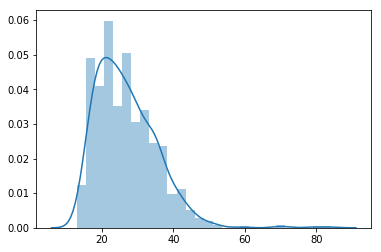

In [69]:
sns.distplot(data[['Age']])

In [70]:
from scipy.stats import boxcox

In [71]:
data[['Age']] , lam = boxcox(data['Age'])

In [72]:
detect_outliers(data['Age'])

[2.2369810163657413, 2.2501203832543624]

In [73]:
find_outliers(data['Age'])

[2.2369810163657413, 2.2501203832543624]

In [74]:
##Lets see those values what it representing for our target variable

In [75]:
data.groupby('Age')['Biopsy'].value_counts()

Age       Biopsy
1.692347  False      1
1.722134  False      4
1.749180  False     21
1.773894  False     22
          True       1
1.796606  False     32
          True       1
1.817583  False     46
          True       2
1.837042  False     40
          True       2
1.855165  False     41
          True       4
1.872104  False     40
          True       6
1.887988  False     25
          True       4
1.902925  False     52
1.917011  False     37
          True       2
1.930325  False     34
          True       2
1.942939  False     37
          True       1
1.954914  False     32
          True       1
1.966305  False     30
          True       6
1.977160  False     29
          True       2
1.987521  False     32
          True       2
1.997425  False     26
2.006907  False     18
2.015998  False     24
          True       4
2.024723  False     22
          True       1
2.033109  False     26
          True       3
2.041178  False     24
2.048949  False     15
          True   

##So we can treat those 2 extreme values with mean or median

In [76]:
age_index = data[data['Age'] == 2.2369810163657413].index
age_index = age_index.append(data[data['Age'] == 2.2501203832543624].index)
age_index

Int64Index([652, 653], dtype='int64')

In [77]:
for i in age_index.values:
    data['Age'][i] = np.median(data['Age']).round()

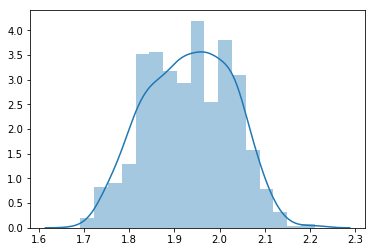

In [78]:
sns.distplot(data[['Age']] )

##So now the variable seems to possess a Gaussian Distribution

## For Number of sexual partners

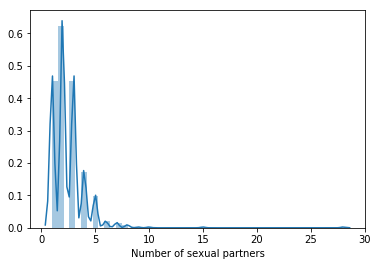

In [79]:
sns.distplot(data['Number of sexual partners'])

In [80]:
data[['Number of sexual partners']] , lam = boxcox(data['Number of sexual partners'])

In [81]:
find_outliers(data['Number of sexual partners'])

[2.4372760327601046, 2.9286706536738527]

In [82]:
detect_outliers(data['Number of sexual partners'])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.670405762875295,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.8033446114761134,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.4372760327601046,
 1.9171965427346362,
 2.1047864166685244,
 0.0,
 1.8033446114761134,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.670405762875295,
 0.0,
 0.0,
 0.0,
 1.670405762875295,
 0.0,
 0.0,
 0.0,
 0.0,
 1.9171965427346362,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.8033446114761134,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.9286706536738527,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [83]:
data['Number of sexual partners'].value_counts()

0.674460    282
1.052163    205
0.000000    205
1.312884     78
1.511063     44
1.670406      9
1.803345      7
1.917197      4
2.016626      1
2.104786      1
2.928671      1
2.437276      1
Name: Number of sexual partners, dtype: int64

In [84]:
data.groupby('Number of sexual partners').Biopsy.value_counts()

Number of sexual partners  Biopsy
0.000000                   False     192
                           True       13
0.674460                   False     264
                           True       18
1.052163                   False     192
                           True       13
1.312884                   False      72
                           True        6
1.511063                   False      40
                           True        4
1.670406                   False       8
                           True        1
1.803345                   False       7
1.917197                   False       4
2.016626                   False       1
2.104786                   False       1
2.437276                   False       1
2.928671                   False       1
Name: Biopsy, dtype: int64

##We can treat values starting from 2 because those are the extreme values and belong to majority class in Target variable.

In [85]:
sex_index = data[data['Number of sexual partners'] == 2.0166262476039485].index
sex_index = sex_index.append(data[data['Number of sexual partners'] == 2.1047864166685244].index)
sex_index = sex_index.append(data[data['Number of sexual partners'] == 2.4372760327601046].index)
sex_index = sex_index.append(data[data['Number of sexual partners'] == 2.9286706536738527].index)
sex_index

Int64Index([817, 190, 183, 455], dtype='int64')

In [86]:
for i in sex_index.values:
    data['Number of sexual partners'][i] = np.median(data['Number of sexual partners']).round()

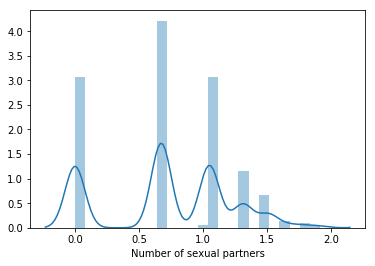

In [87]:
sns.distplot(data['Number of sexual partners'])

##Better than before.If need we can do changes later.

## For First sexual intercourse

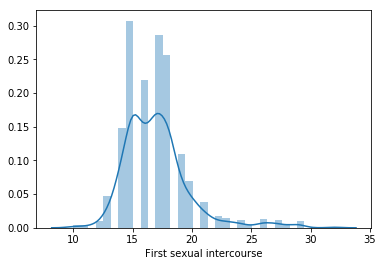

In [88]:
sns.distplot(data['First sexual intercourse'])

In [89]:
##Here the skewness is not extreme for to do box-cox transformation. So lets proceed with original data

In [90]:
find_outliers(data['First sexual intercourse'])

[26.0,
 26.0,
 27.0,
 26.0,
 27.0,
 27.0,
 32.0,
 29.0,
 29.0,
 28.0,
 26.0,
 27.0,
 26.0,
 26.0,
 29.0,
 28.0,
 28.0,
 29.0,
 27.0,
 29.0,
 26.0,
 27.0]

In [91]:
detect_outliers(data['First sexual intercourse'])

[23.0,
 26.0,
 26.0,
 25.0,
 27.0,
 23.0,
 24.0,
 26.0,
 24.0,
 23.0,
 27.0,
 27.0,
 32.0,
 29.0,
 23.0,
 29.0,
 28.0,
 10.0,
 23.0,
 26.0,
 24.0,
 23.0,
 27.0,
 10.0,
 24.0,
 26.0,
 26.0,
 29.0,
 24.0,
 28.0,
 25.0,
 28.0,
 29.0,
 23.0,
 27.0,
 29.0,
 26.0,
 27.0,
 23.0,
 24.0]

In [92]:
data.groupby('First sexual intercourse').Biopsy.value_counts()

First sexual intercourse  Biopsy
10.0                      False       2
11.0                      False       1
                          True        1
12.0                      False       4
                          True        1
13.0                      False      24
                          True        1
14.0                      False      76
                          True        2
15.0                      False     153
                          True        9
16.0                      False     112
                          True        4
17.0                      False     136
                          True       15
18.0                      False     123
                          True       12
19.0                      False      51
                          True        7
20.0                      False      36
                          True        1
21.0                      False      20
22.0                      False       9
23.0                      False       7
       

##So its better to treat values greater than 23

In [93]:
intercourse_index = data[data['First sexual intercourse'] == 24].index
intercourse_index = intercourse_index.append(data[data['First sexual intercourse'] == 25].index)
intercourse_index = intercourse_index.append(data[data['First sexual intercourse'] == 26].index)
intercourse_index = intercourse_index.append(data[data['First sexual intercourse'] == 27].index)
intercourse_index = intercourse_index.append(data[data['First sexual intercourse'] == 28].index)
intercourse_index = intercourse_index.append(data[data['First sexual intercourse'] == 29].index)
intercourse_index = intercourse_index.append(data[data['First sexual intercourse'] == 32].index)
intercourse_index

Int64Index([ 28,  38, 212, 467, 545, 836,  13, 554,   7,  10,  29, 208, 475,
            480, 757,  19,  74,  79, 304, 661, 804, 136, 548, 570,  92, 126,
            487, 592, 666,  88],
           dtype='int64')

In [94]:
for i in intercourse_index.values:
    data['First sexual intercourse'][i] = np.median(data['First sexual intercourse']).round()

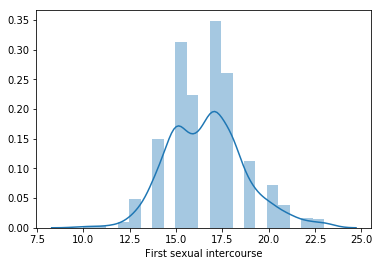

In [95]:
sns.distplot(data['First sexual intercourse'])

##Looks better to be Gaussian 

## For Num of pregnancies

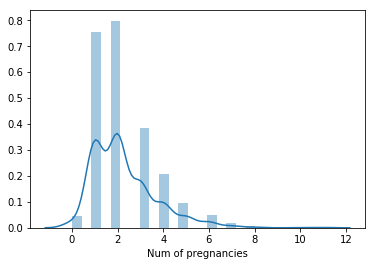

In [96]:
sns.distplot(data['Num of pregnancies'])

In [97]:
data[['Num of pregnancies']] , lam = boxcox(data['Num of pregnancies'] + 1)

In [98]:
find_outliers(data['Num of pregnancies'])

[2.115710672888122, 2.052842707615154]

In [99]:
detect_outliers(data['Num of pregnancies'])

[]

In [100]:
data.groupby('Num of pregnancies').Biopsy.value_counts()

Num of pregnancies  Biopsy
0.000000            False      15
                    True        1
0.662129            False     255
                    True       12
1.022053            False     265
                    True       18
1.265894            False     125
                    True       11
1.448705            False      63
                    True       11
1.594093            False      33
                    True        1
1.714294            False      17
                    True        1
1.816441            False       6
1.905046            False       2
2.052843            False       1
2.115711            False       1
Name: Biopsy, dtype: int64

##So we can treat those two values

In [101]:
pregnant_index = data[data['Num of pregnancies'] == 2.115710672888122].index
pregnant_index = pregnant_index.append(data[data['Num of pregnancies'] == 2.052842707615154].index)
pregnant_index

Int64Index([653, 667], dtype='int64')

In [102]:
for i in pregnant_index.values:
    data['Num of pregnancies'][i] = np.median(data['Num of pregnancies']).round()

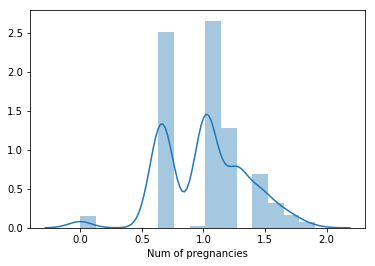

In [103]:
sns.distplot(data['Num of pregnancies'])

##Its seems better than before

## For Smokes (years)

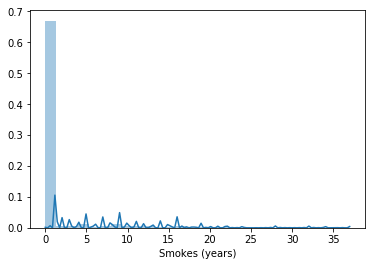

In [104]:
sns.distplot(data['Smokes (years)'])

In [105]:
data[['Smokes (years)']] , lam = boxcox(data['Smokes (years)'] + 1)

In [106]:
find_outliers(data['Smokes (years)'])

[]

In [107]:
##a = detect_outliers(data['Smokes (years)'])

In [108]:
##b = set(a)

In [109]:
data['Smokes (years)'].describe()

count    838.000000
mean       0.046724
std        0.108963
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.308927
Name: Smokes (years), dtype: float64

##We going to remove all the outliers

In [110]:
data.groupby('Smokes (years)').Biopsy.value_counts()

Smokes (years)  Biopsy
0.000000        False     663
                True       44
0.117852        False       1
0.225781        False       3
0.276163        False       7
0.286291        False       9
                True        1
0.287088        False      13
                True        1
0.300110        False       6
                True        1
0.305454        False       6
                True        1
0.307241        False       5
0.307994        False       8
                True        1
0.308361        False       4
0.308560        False       6
0.308677        False       6
0.308750        False       9
0.308798        False       4
                True        1
0.308830        False       5
0.308852        False       2
                True        1
0.308869        False       3
0.308881        False       3
                True        1
0.308890        False       3
                True        1
0.308897        False       6
0.308907        False       1
0.308910        F

##Lets treat values greater than 15. Because 14 and 15 having 1's for target. we won't need to alter it now

In [111]:
##for i in b:
##    smokes_index = []
##    index = data[data['Smokes (years)'] == i].index
##    smokes_index.extend(index)
##    (smokes_index)
##    print(smokes_index)

In [112]:
##smokesyr_index = [3,6,9, 32, 42, 171, 263, 288, 372, 457, 518, 612, 699, 712, 739, 743,28, 289, 377, 396, 631, 676, 780,44, 
##                  174, 187,46, 186, 297, 451, 564, 648, 669, 770, 773, 781,53,57, 202, 227, 386, 586, 723,61, 111, 807,67,
##                  105, 239, 497, 616, 619, 722,201, 343, 374, 380, 537, 539, 806,337,774,193, 371, 478, 508, 512, 649, 691, 
##                  795, 844,155, 609, 755, 837, 849,133, 213, 687, 804,125, 216, 259, 650, 782,145, 305, 422,252, 446, 592, 842,
##                  78, 394, 573,212, 264, 426, 467, 572, 599, 620, 704, 792,81, 142, 506, 563, 579, 834,131, 662,805,801,10, 21, 
##                  338, 388, 744,302, 414, 428, 522, 550, 643, 735,74, 96, 290, 587,668]

In [113]:
##for i in smokesyr_index:
##    data['Smokes (years)'][i] = np.median(data['Smokes (years)'])

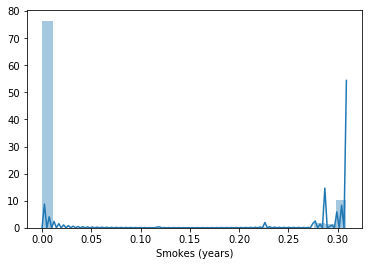

In [114]:
sns.distplot(data['Smokes (years)'])

## For Smokes (packs/year)

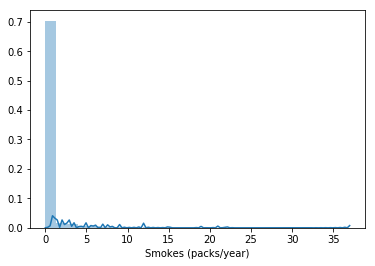

In [115]:
sns.distplot(data['Smokes (packs/year)'])

In [116]:
data[['Smokes (packs/year)']] , lam = boxcox(data['Smokes (packs/year)'] + 1)

In [117]:
find_outliers(data['Smokes (packs/year)'])

[]

In [118]:
##a = detect_outliers(data['Smokes (packs/year)'])

In [119]:
##b = set(a)

In [120]:
##for i in b:
##    smokespack_index = []
##    index = data[data['Smokes (packs/year)'] == i].index
##    smokespack_index.extend(index)
##    smokespack_index

In [121]:
##index = [9, 804,44, 187, 592,57, 579,133, 386,201, 343, 388, 522,212, 426, 467,213,289, 338, 377, 587, 631,371,508, 512,722,
##         723,795,394,774,805,422,539,612,735,837,46, 186, 259, 297, 451, 564, 648, 669, 770, 773, 781,53,96,74,67,337,396,428,
##         145,478,506,691, 844,807,252, 446, 619, 780,3,6,42, 563,105, 216, 497, 801,111,81, 239,131,125, 374, 537, 650, 744, 
##         806,78,142,609,662,743,699,572,155,755,28,32, 107, 171, 193, 219, 263, 288, 305, 372, 457, 518, 586, 620, 668, 712, 
##         739, 782,61,174,264,290, 599, 676, 792,302, 550, 643,202, 687,414,573,704,380,842,227,649,834,616, 849]

In [122]:
data.groupby('Smokes (packs/year)').Biopsy.value_counts()

Smokes (packs/year)  Biopsy
0.000000             False     663
                     True       44
0.000997             False       1
0.002969             False       1
0.022982             False       1
0.035023             False       1
0.042410             False       3
                     True        1
0.072946             False       3
0.095265             False       1
0.098973             False       2
0.111803             False       4
0.124211             False       1
0.133629             False       1
0.136746             False       1
0.143261             False       1
0.146450             False       1
0.150825             False       1
0.151712             False       9
                     True        1
0.154275             False       1
0.155060             False      16
                     True        1
0.162418             False       1
0.163591             False       4
0.164555             False       2
0.166011             False       1
0.167023             False 

In [123]:
##for i in index:
##    data['Smokes (packs/year)'][i] = np.mean(data['Smokes (packs/year)'])

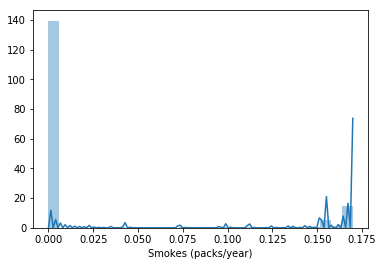

In [124]:
sns.distplot(data['Smokes (packs/year)'])

## For Hormonal Contraceptives (years)

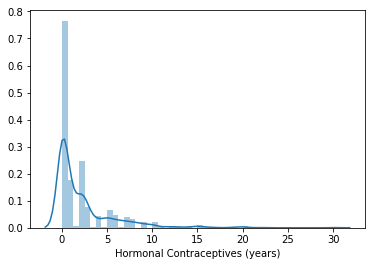

In [125]:
sns.distplot(data['Hormonal Contraceptives (years)'])

In [126]:
data['Hormonal Contraceptives (years)'] , lam = boxcox(data['Hormonal Contraceptives (years)']+1)

In [127]:
find_outliers(data['Hormonal Contraceptives (years)'])

[]

In [128]:
detect_outliers(data['Hormonal Contraceptives (years)'])

[]

In [129]:
data.groupby('Hormonal Contraceptives (years)').Biopsy.value_counts()

Hormonal Contraceptives (years)  Biopsy
0.000000                         False     250
                                 True       19
0.075212                         False      24
                                 True        1
0.142006                         False      15
                                 True        1
0.149839                         False       1
0.208857                         False      38
                                 True        3
0.262126                         False       8
                                 True        1
0.310502                         False       1
0.316241                         False       6
                                 True        2
0.359933                         False      21
                                 True        4
0.400049                         False       5
                                 True        1
0.437042                         False       6
0.441466                         False       2
0.475392            

##After transformation there it doesn't seem to have an outlier

In [130]:
##harmonal_index = data[data['Hormonal Contraceptives (years)'] == 15].index
##harmonal_index = harmonal_index.append(data[data['Hormonal Contraceptives (years)'] == 16].index)
##harmonal_index = harmonal_index.append(data[data['Hormonal Contraceptives (years)'] == 17].index)
##harmonal_index = harmonal_index.append(data[data['Hormonal Contraceptives (years)'] == 19].index)
##harmonal_index = harmonal_index.append(data[data['Hormonal Contraceptives (years)'] == 20].index)
##harmonal_index = harmonal_index.append(data[data['Hormonal Contraceptives (years)'] == 22].index)
##harmonal_index = harmonal_index.append(data[data['Hormonal Contraceptives (years)'] == 30].index)
##harmonal_index

In [131]:
##for i in harmonal_index.values:
##    data['Hormonal Contraceptives (years)'][i] = np.median(data['Hormonal Contraceptives (years)'])

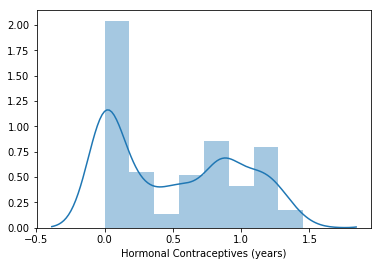

In [132]:
sns.distplot(data['Hormonal Contraceptives (years)'])

## For IUD (years)

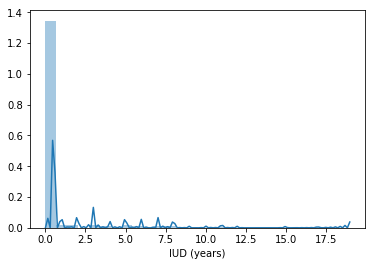

In [133]:
sns.distplot(data['IUD (years)'])

In [134]:
data[['IUD (years)']] , lam = boxcox(data['IUD (years)']+1)

In [135]:
find_outliers(data['IUD (years)'])

[]

In [136]:
##detect_outliers(data['IUD (years)'])

In [137]:
data['IUD (years)'].describe()

count    838.000000
mean       0.045839
std        0.088702
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.243716
Name: IUD (years), dtype: float64

In [138]:
data.groupby('IUD (years)').Biopsy.value_counts()

IUD (years)  Biopsy
0.000000     False     615
             True       43
0.065994     False       2
0.111159     False       1
0.115746     False       1
0.146161     False       1
0.168085     False       1
0.184203     False       1
0.197547     False       2
0.199370     False      94
             True        3
0.206412     False       1
0.226586     False       1
0.229535     False       7
             True        1
0.238040     False       1
0.241030     False       9
             True        1
0.242892     False       7
             True        4
0.243387     False       5
0.243561     False       9
0.243634     False       4
             True        1
0.243669     False       6
             True        1
0.243687     False       7
0.243698     False       1
0.243704     False       1
0.243708     False       2
             True        1
0.243710     False       1
0.243714     False       1
0.243715     False       1
0.243716     False       1
Name: Biopsy, dtype: int64

In [139]:
##iud_index = data[data['IUD (years)'] == 6].index
##iud_index = iud_index.append(data[data['IUD (years)'] == 7].index)
##iud_index = iud_index.append(data[data['IUD (years)'] == 8].index)
##iud_index = iud_index.append(data[data['IUD (years)'] == 9].index)
##iud_index = iud_index.append(data[data['IUD (years)'] == 10].index)
##iud_index = iud_index.append(data[data['IUD (years)'] == 11].index)
##iud_index = iud_index.append(data[data['IUD (years)'] == 12].index)
##iud_index = iud_index.append(data[data['IUD (years)'] == 15].index)
##iud_index = iud_index.append(data[data['IUD (years)'] == 17].index)
##iud_index = iud_index.append(data[data['IUD (years)'] == 19].index)
##iud_index

In [140]:
##for i in iud_index.values:
##    data['IUD (years)'][i] = np.median(data['IUD (years)'])

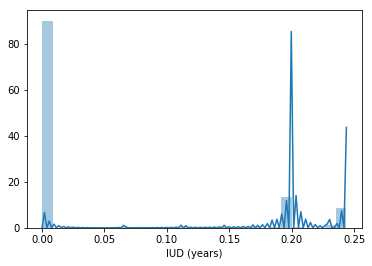

In [141]:
sns.distplot(data['IUD (years)'])

## So finished treating Outliers in Numerical Variables to a certain extent

## Trial modelling to compare Box-Cox -- With Transformation

In [142]:
x = data[['Hormonal Contraceptives' , 'IUD' , 'STDs' , 'STDs:condylomatosis' , 'STDs:vulvo-perineal condylomatosis' ,
          'Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)','Hormonal Contraceptives (years)',
          'IUD (years)','STDs (number)','STDs: Number of diagnosis','STDs:HIV']]

y = data[['Biopsy']]

In [143]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 100)

In [144]:
seed = 10

In [145]:
kfold = model_selection.KFold(n_splits=10 , random_state=seed)
model = RandomForestClassifier()
scoring = 'accuracy'

In [146]:
results = model_selection.cross_val_score(model , x_train , y_train , cv=kfold , scoring=scoring)
print('Accuracy : %.3f(%.3f)' % (results.mean() , results.std()))

Accuracy : 0.934(0.019)


In [147]:
model.fit(x_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [148]:
prediction = model.predict(x_test)

In [149]:
metrics.accuracy_score(prediction , y_test)

0.9126984126984127

In [150]:
print(metrics.classification_report(y_test , prediction))

              precision    recall  f1-score   support

       False       0.93      0.97      0.95       234
        True       0.25      0.11      0.15        18

   micro avg       0.91      0.91      0.91       252
   macro avg       0.59      0.54      0.55       252
weighted avg       0.89      0.91      0.90       252



In [151]:
kfold = model_selection.KFold(n_splits=10 , random_state=seed)
model = RandomForestClassifier(max_depth=5)
scoring = 'roc_auc'

In [152]:
results = model_selection.cross_val_score(model , x_train, y_train , cv=kfold , scoring=scoring)
print('AUC : %.3f(%.3f)' % (results.mean() , results.std()))

AUC : 0.628(0.168)


##Since after trying multiple time Cross-Validation it seems With transformation gives better result. So lets proceed with it.

## First we going to make target column as three class using RF probabilities and perform LDA to check for Discriminant class.

In [153]:
data1 = data[['Hormonal Contraceptives' , 'IUD' , 'STDs' , 'STDs:condylomatosis' , 'STDs:vulvo-perineal condylomatosis' ,
          'Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)','Hormonal Contraceptives (years)',
          'IUD (years)','STDs (number)','STDs: Number of diagnosis','STDs:HIV' ,'Biopsy']]

In [154]:
x = data1[['Hormonal Contraceptives' , 'IUD' , 'STDs' , 'STDs:condylomatosis' , 'STDs:vulvo-perineal condylomatosis' ,
          'Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)','Hormonal Contraceptives (years)',
          'IUD (years)','STDs (number)','STDs: Number of diagnosis','STDs:HIV']]

y = data1[['Biopsy']]

In [155]:
clf = RandomForestClassifier(max_depth=5 , random_state=555)

In [156]:
clf.fit(x , y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=555, verbose=0, warm_start=False)

In [157]:
prob = clf.predict_proba(x)

In [158]:
prob = pd.DataFrame(prob)

In [159]:
prob.drop(1 , axis=1 , inplace=True)

In [160]:
prob[prob[0]>0.8] = 0

In [161]:
prob[(prob[0]<0.6) & (prob[0] != 0)] = 1

In [162]:
prob[(prob[0] >= 0.6) & (prob[0] <= 0.8)] = 2

In [163]:
prob[0].value_counts()

0.0    800
2.0     30
1.0      8
Name: 0, dtype: int64

### LDA

In [164]:
data1['prob_biopsy'] = prob

In [165]:
data1.prob_biopsy.value_counts()

0.0    800
2.0     30
1.0      8
Name: prob_biopsy, dtype: int64

In [166]:
x = data1[['Hormonal Contraceptives' , 'IUD' , 'STDs' , 'STDs:condylomatosis' , 'STDs:vulvo-perineal condylomatosis' ,
          'Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)','Hormonal Contraceptives (years)',
          'IUD (years)','STDs (number)','STDs: Number of diagnosis','STDs:HIV']]

y = data1[['prob_biopsy']]

In [167]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 100)

In [168]:
lda = LinearDiscriminantAnalysis()

In [169]:
seed = 10

In [170]:
kfold = model_selection.KFold(n_splits=10 , random_state=seed)
model = LinearDiscriminantAnalysis()
scoring = 'accuracy'

In [171]:
results = model_selection.cross_val_score(model , x_train , y_train , cv=kfold , scoring=scoring)
print('Accuracy : %.3f(%.3f)' % (results.mean() , results.std()))

Accuracy : 0.922(0.031)


In [172]:
lda.fit(x_train , y_train)
prediction = lda.predict(x_test)
print('Accuracy :' , metrics.accuracy_score(y_test, prediction))
print('\n\n Classfication Table :\n\n' , metrics.classification_report(y_test , prediction))

Accuracy : 0.9642857142857143


 Classfication Table :

               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       244
         1.0       0.00      0.00      0.00         2
         2.0       0.38      0.50      0.43         6

   micro avg       0.96      0.96      0.96       252
   macro avg       0.45      0.49      0.47       252
weighted avg       0.96      0.96      0.96       252



In [1]:
##There doesn't seem to exist an discriminant class

## End-To-End 

In [174]:
x = data1[['Hormonal Contraceptives' , 'IUD' , 'STDs' , 'STDs:condylomatosis' , 'STDs:vulvo-perineal condylomatosis' ,
          'Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)','Hormonal Contraceptives (years)',
          'IUD (years)','STDs (number)','STDs: Number of diagnosis','STDs:HIV']]

y = data1[['Biopsy']]

In [175]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 100)

In [176]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [177]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))

In [178]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.936879 (0.020187)
KNN: 0.936879 (0.020187)
CART: 0.875511 (0.042880)
NB: 0.866891 (0.048730)


## Standardising

In [179]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB' , Pipeline([('Scaler' , StandardScaler()), ('NB', GaussianNB())])))

In [180]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.936879 (0.020187)
ScaledKNN: 0.936879 (0.020187)
ScaledCART: 0.866978 (0.042800)
ScaledNB: 0.866891 (0.048730)


## Tuning KNN

In [181]:
# KNN Algorithm tuning

scaler = StandardScaler().fit(x_train)
scaledX = scaler.transform(x_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(scaledX, y_train)

In [182]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.936860 using {'n_neighbors': 5}
0.902730 (0.013365) with: {'n_neighbors': 1}
0.926621 (0.018544) with: {'n_neighbors': 3}
0.936860 (0.020192) with: {'n_neighbors': 5}
0.936860 (0.020192) with: {'n_neighbors': 7}
0.936860 (0.020192) with: {'n_neighbors': 9}
0.936860 (0.020192) with: {'n_neighbors': 11}
0.936860 (0.020192) with: {'n_neighbors': 13}
0.936860 (0.020192) with: {'n_neighbors': 15}
0.936860 (0.020192) with: {'n_neighbors': 17}
0.936860 (0.020192) with: {'n_neighbors': 19}
0.936860 (0.020192) with: {'n_neighbors': 21}


##So the best result is from Logistics Regression and KNN which both gives same result

## Ensemble Techniques

In [183]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledBG', Pipeline([('Scaler' , StandardScaler()), ('BG', BaggingClassifier())])))
ensembles.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()), ('GB', GradientBoostingClassifier())])))

In [184]:
results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: 0.924956 (0.026550)
ScaledRF: 0.931765 (0.017047)
ScaledBG: 0.933518 (0.021956)
ScaledGB: 0.926680 (0.027398)


## Changing base-estimator for AdaBoost and Bagging 

In [185]:
# Base as Logistic Regression

ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier(base_estimator=LogisticRegression()))])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledBG', Pipeline([('Scaler' , StandardScaler()), ('BG', BaggingClassifier(base_estimator=LogisticRegression()))])))
ensembles.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()), ('GB', GradientBoostingClassifier())])))

In [186]:
results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: 0.936879 (0.020187)
ScaledRF: 0.935184 (0.016639)
ScaledBG: 0.935184 (0.019793)
ScaledGB: 0.923261 (0.026537)


In [187]:
## Base as KNN for Bagging

ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier(base_estimator=LogisticRegression()))])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledBG', Pipeline([('Scaler' , StandardScaler()), ('BG', BaggingClassifier(base_estimator=KNeighborsClassifier()))])))
ensembles.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()), ('GB', GradientBoostingClassifier())])))

In [188]:
results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: 0.936879 (0.020187)
ScaledRF: 0.933518 (0.023228)
ScaledBG: 0.933460 (0.022097)
ScaledGB: 0.924985 (0.027528)


##So Ada-Boost with LogisticRegression as base-estimator performing slightly better than other ensemble.
##Even lets try tuning parameters for top three performers from above

In [189]:
##Parameters for RF

param_grid = dict(n_estimators=np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]) , max_depth = np.array([1,3,5,7,9,10,13]))

In [190]:
# Tune scaled Random Forest
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [191]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): 
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.938567 using {'max_depth': 10, 'n_estimators': 10}
0.936860 (0.020192) with: {'max_depth': 1, 'n_estimators': 10}
0.936860 (0.020192) with: {'max_depth': 1, 'n_estimators': 20}
0.936860 (0.020192) with: {'max_depth': 1, 'n_estimators': 30}
0.936860 (0.020192) with: {'max_depth': 1, 'n_estimators': 40}
0.936860 (0.020192) with: {'max_depth': 1, 'n_estimators': 50}
0.936860 (0.020192) with: {'max_depth': 1, 'n_estimators': 60}
0.936860 (0.020192) with: {'max_depth': 1, 'n_estimators': 70}
0.936860 (0.020192) with: {'max_depth': 1, 'n_estimators': 80}
0.936860 (0.020192) with: {'max_depth': 1, 'n_estimators': 90}
0.936860 (0.020192) with: {'max_depth': 1, 'n_estimators': 100}
0.935154 (0.019881) with: {'max_depth': 3, 'n_estimators': 10}
0.936860 (0.020192) with: {'max_depth': 3, 'n_estimators': 20}
0.936860 (0.020192) with: {'max_depth': 3, 'n_estimators': 30}
0.936860 (0.020192) with: {'max_depth': 3, 'n_estimators': 40}
0.936860 (0.020192) with: {'max_depth': 3, 'n_estimators':

## Random forest Best: 0.938567 using {'max_depth': 10, 'n_estimators': 10}

In [192]:
##Parameters for AdaBoost

param_grid = dict(n_estimators=np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))

In [193]:
# Tune scaled Ada Boost
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
model = AdaBoostClassifier(base_estimator=LogisticRegression() , random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [194]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): 
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.936860 using {'n_estimators': 10}
0.936860 (0.020192) with: {'n_estimators': 10}
0.936860 (0.020192) with: {'n_estimators': 20}
0.936860 (0.020192) with: {'n_estimators': 30}
0.936860 (0.020192) with: {'n_estimators': 40}
0.936860 (0.020192) with: {'n_estimators': 50}
0.936860 (0.020192) with: {'n_estimators': 60}
0.936860 (0.020192) with: {'n_estimators': 70}
0.936860 (0.020192) with: {'n_estimators': 80}
0.936860 (0.020192) with: {'n_estimators': 90}
0.936860 (0.020192) with: {'n_estimators': 100}


## Ada-Boost Best: 0.936860 using {'n_estimators': 10}

In [195]:
##Parameters for Bagging

LR = LogisticRegression()
KNN = KNeighborsClassifier()
param_grid = dict(n_estimators=np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]) , base_estimator = [LR , KNN])

In [196]:
# Tune scaled Bagging
scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
model = BaggingClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [197]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): 
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.936860 using {'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), 'n_estimators': 30}
0.933447 (0.023527) with: {'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), 'n_estimators': 10}
0.935154 (0.021310) with: {'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), 'n_estimators': 20}
0.936860 (0.020

## Bagging Best: 0.936860 with Base as LogisticRegression and n-estimators as 30

## Finalising the model

In [198]:
# prepare the model

scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
model = AdaBoostClassifier(base_estimator=LogisticRegression(),  n_estimators=10)
model.fit(rescaledX, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=10, random_state=None)

In [199]:
# Performation in the validation dataset

rescaledValidationX = scaler.transform(x_test)
predictions = model.predict(rescaledValidationX)
print('Accuracy :' , metrics.accuracy_score(y_test, predictions))
print('\n\n Classfication Table :\n\n' , metrics.classification_report(y_test , predictions))

Accuracy : 0.9285714285714286


 Classfication Table :

               precision    recall  f1-score   support

       False       0.93      1.00      0.96       234
        True       0.00      0.00      0.00        18

   micro avg       0.93      0.93      0.93       252
   macro avg       0.46      0.50      0.48       252
weighted avg       0.86      0.93      0.89       252



In [200]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 837
Data columns (total 19 columns):
Hormonal Contraceptives               838 non-null object
IUD                                   838 non-null object
STDs                                  838 non-null object
STDs:condylomatosis                   838 non-null object
STDs:vulvo-perineal condylomatosis    838 non-null object
Age                                   838 non-null float64
Number of sexual partners             838 non-null float64
First sexual intercourse              838 non-null float64
Num of pregnancies                    838 non-null float64
Smokes                                838 non-null object
Smokes (years)                        838 non-null float64
Smokes (packs/year)                   838 non-null float64
Hormonal Contraceptives (years)       838 non-null float64
IUD (years)                           838 non-null float64
STDs (number)                         838 non-null float64
STDs: Number of 

In [202]:
data1.to_csv('Final.csv' , index=False)

## Lets try Handling class imbalance SMOTE 

In [173]:
data = pd.read_csv('Final.csv')

In [174]:
data.head()

,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs:HIV,Biopsy,prob_biopsy
0,0,0,0,0,0,1.817583,1.312884,15.0,0.662129,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,False,0.0
1,0,0,0,0,0,1.749180,0.000000,14.0,0.662129,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,False,0.0
2,0,0,0,0,0,2.024723,0.000000,17.0,0.662129,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,False,0.0
3,1,0,0,0,0,2.139511,1.511063,16.0,1.448705,1,0.308927,0.169896,0.941379,0.0,0.0,0.0,0,False,2.0
4,1,0,0,0,0,2.108123,1.052163,21.0,1.448705,0,0.000000,0.000000,1.351310,0.0,0.0,0.0,0,False,0.0


In [175]:
data.drop('prob_biopsy' , axis=1 , inplace=True)

In [176]:
data.head()

,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs:HIV,Biopsy
0,0,0,0,0,0,1.817583,1.312884,15.0,0.662129,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,False
1,0,0,0,0,0,1.749180,0.000000,14.0,0.662129,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,False
2,0,0,0,0,0,2.024723,0.000000,17.0,0.662129,0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,False
3,1,0,0,0,0,2.139511,1.511063,16.0,1.448705,1,0.308927,0.169896,0.941379,0.0,0.0,0.0,0,False
4,1,0,0,0,0,2.108123,1.052163,21.0,1.448705,0,0.000000,0.000000,1.351310,0.0,0.0,0.0,0,False


In [177]:
data.Biopsy.value_counts()

False    783
True      55
Name: Biopsy, dtype: int64

In [178]:
data.columns

Index(['Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'Age',
       'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs: Number of diagnosis', 'STDs:HIV', 'Biopsy'],
      dtype='object')

In [179]:
x = data[['Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'Age',
       'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs: Number of diagnosis', 'STDs:HIV']]

y = data[['Biopsy']]

In [180]:
validation_size = 0.20
seed = 7
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=validation_size, random_state=seed)

In [181]:
##Proportion of 0's and 1's in train and validation

train_ratio = pd.DataFrame(y_train)
print('Train Ratio:\n' ,train_ratio.Biopsy.value_counts())

validation_ratio = pd.DataFrame(y_validation)
print('Test Ratio :\n' ,validation_ratio.Biopsy.value_counts())

Train Ratio:
 False    622
True      48
Name: Biopsy, dtype: int64
Test Ratio :
 False    161
True       7
Name: Biopsy, dtype: int64


In [182]:
sm = SMOTE(ratio=0.3,random_state=2)

x,y = sm.fit_sample(x_train,y_train)

In [183]:
data1=pd.DataFrame(x,columns=['Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'Age',
       'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs: Number of diagnosis', 'STDs:HIV'])

In [184]:
data1.head()

,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs:HIV
0,1.0,0.0,0.0,0.0,0.0,1.987521,0.674460,18.0,0.000000,0.0,0.000000,0.000000,0.567132,0.00000,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.887988,0.674460,15.0,1.022053,1.0,0.307994,0.168460,1.148392,0.00000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.872104,1.052163,17.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,2.090273,1.312884,16.0,1.265894,1.0,0.308923,0.169895,0.000000,0.24103,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.942939,1.052163,17.0,1.265894,0.0,0.000000,0.000000,0.316241,0.00000,0.0,0.0,0.0


In [185]:
data1['Biopsy'] = y

In [186]:
data1.head()

,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs:HIV,Biopsy
0,1.0,0.0,0.0,0.0,0.0,1.987521,0.674460,18.0,0.000000,0.0,0.000000,0.000000,0.567132,0.00000,0.0,0.0,0.0,False
1,1.0,0.0,0.0,0.0,0.0,1.887988,0.674460,15.0,1.022053,1.0,0.307994,0.168460,1.148392,0.00000,0.0,0.0,0.0,True
2,0.0,0.0,0.0,0.0,0.0,1.872104,1.052163,17.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,True
3,0.0,1.0,0.0,0.0,0.0,2.090273,1.312884,16.0,1.265894,1.0,0.308923,0.169895,0.000000,0.24103,0.0,0.0,0.0,False
4,1.0,0.0,0.0,0.0,0.0,1.942939,1.052163,17.0,1.265894,0.0,0.000000,0.000000,0.316241,0.00000,0.0,0.0,0.0,False


In [187]:
data1['Biopsy'].value_counts()

False    622
True     186
Name: Biopsy, dtype: int64

## Getting probabilities for target class to split it into 3 class

In [188]:
x = data1[['Hormonal Contraceptives' , 'IUD' , 'STDs' , 'STDs:condylomatosis' , 'STDs:vulvo-perineal condylomatosis' ,
          'Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)','Hormonal Contraceptives (years)',
          'IUD (years)','STDs (number)','STDs: Number of diagnosis','STDs:HIV']]

y = data1[['Biopsy']]

In [189]:
clf = RandomForestClassifier(max_depth=5 , random_state=555)

In [190]:
clf.fit(x , y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=555, verbose=0, warm_start=False)

In [191]:
prob = clf.predict_proba(x)

prob = pd.DataFrame(prob)

prob.drop(1 , axis=1 , inplace=True)

prob.head()

,0
0,0.884316
1,0.732050
2,0.825658
3,0.797687
4,0.756857


In [192]:
prob[prob[0]>0.8] = 0

prob[(prob[0]<0.6) & (prob[0] != 0)] = 1

prob[(prob[0] >= 0.6) & (prob[0] <= 0.8)] = 2

prob[0].value_counts()

0.0    477
2.0    231
1.0    100
Name: 0, dtype: int64

### LDA After SMOTE

In [193]:
data1['prob_biopsy'] = prob

In [194]:
data1.prob_biopsy.value_counts()

0.0    477
2.0    231
1.0    100
Name: prob_biopsy, dtype: int64

In [195]:
x = data1[['Hormonal Contraceptives' , 'IUD' , 'STDs' , 'STDs:condylomatosis' , 'STDs:vulvo-perineal condylomatosis' ,
          'Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)','Hormonal Contraceptives (years)',
          'IUD (years)','STDs (number)','STDs: Number of diagnosis','STDs:HIV']]

y = data1[['prob_biopsy']]

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 100)

In [196]:
lda = LinearDiscriminantAnalysis()

seed = 10

In [197]:
kfold = model_selection.KFold(n_splits=10 , random_state=seed)
model = LinearDiscriminantAnalysis()
scoring = 'accuracy'

In [198]:
results = model_selection.cross_val_score(model , x_train , y_train , cv=kfold , scoring=scoring)
print('Accuracy : %.3f(%.3f)' % (results.mean() , results.std()))

Accuracy : 0.669(0.055)


In [199]:
lda.fit(x_train , y_train)
prediction = lda.predict(x_test)
print('\n\tResult of LDA for TEST Data with Target column having 3 class - Splitted the Probabilities of original column into 3')
print('\n\nAccuracy :' , metrics.accuracy_score(y_test, prediction))
print('\n\nClassfication Table :\n\n' , metrics.classification_report(y_test , prediction))


	Result of LDA for TEST Data with Target column having 3 class - Splitted the Probabilities of original column into 3


Accuracy : 0.6831275720164609


Classfication Table :

               precision    recall  f1-score   support

         0.0       0.77      0.76      0.77       156
         1.0       0.62      0.57      0.59        23
         2.0       0.50      0.53      0.52        64

   micro avg       0.68      0.68      0.68       243
   macro avg       0.63      0.62      0.62       243
weighted avg       0.69      0.68      0.68       243



## End-To-End After Using SMOTE

In [200]:
x = data1[['Hormonal Contraceptives' , 'IUD' , 'STDs' , 'STDs:condylomatosis' , 'STDs:vulvo-perineal condylomatosis' ,
          'Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)','Hormonal Contraceptives (years)',
          'IUD (years)','STDs (number)','STDs: Number of diagnosis','STDs:HIV']]

y = data1[['Biopsy']]

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 100)

In [201]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [202]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))

In [203]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.762939 (0.068190)
KNN: 0.826535 (0.045339)
CART: 0.837437 (0.058384)
NB: 0.745050 (0.041790)


## Standardizing

In [204]:
# Standardize the dataset

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB' , Pipeline([('Scaler' , StandardScaler()), ('NB', GaussianNB())])))

In [205]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.761153 (0.062451)
ScaledKNN: 0.803509 (0.033430)
ScaledCART: 0.856861 (0.047170)
ScaledNB: 0.745050 (0.041790)


##Standardizing doesn't improve performance of any Algorithm

##Decision tree performing best

## Ensemble Techniques

In [375]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledBG', Pipeline([('Scaler' , StandardScaler()), ('BG', BaggingClassifier())])))
ensembles.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()), ('GB', GradientBoostingClassifier())])))

In [376]:
results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: 0.872588 (0.039216)
ScaledRF: 0.895645 (0.045383)
ScaledBG: 0.886905 (0.057824)
ScaledGB: 0.900877 (0.031787)


##Gradient-Boosting performs best follow by Random Forest and Bagging

## Changing Parameters for Ensemble

##Changing base estimator as Decision-Tree for Adaboost and bagging

In [379]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledBG', Pipeline([('Scaler' , StandardScaler()), ('BG', BaggingClassifier(base_estimator=DecisionTreeClassifier()))])))
ensembles.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()), ('GB', GradientBoostingClassifier())])))

In [380]:
results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: 0.863816 (0.040056)
ScaledRF: 0.869204 (0.048226)
ScaledBG: 0.890257 (0.050918)
ScaledGB: 0.897306 (0.032480)


##However Gradient-Boosting performance Tops

## Finalizing the model with Gradient-Boosting

In [381]:
# Model Preparation

scaler = StandardScaler().fit(x_train)
rescaledX = scaler.transform(x_train)
model = GradientBoostingClassifier()
model.fit(rescaledX, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [382]:
# Transforming and fitting the Test data

rescaledValidationX = scaler.transform(x_test)
predictions = model.predict(rescaledValidationX)
print('\n\t\t\t\t\tResult of Gradient-Boosting for TEST Data')
print('\n\nAccuracy :' , metrics.accuracy_score(y_test, predictions))
print('\n\nClassfication Table :\n\n' , metrics.classification_report(y_test , predictions))


					Result of Gradient-Boosting for TEST Data


Accuracy : 0.8888888888888888


Classfication Table :

               precision    recall  f1-score   support

       False       0.88      0.99      0.93       193
        True       0.96      0.48      0.64        50

   micro avg       0.89      0.89      0.89       243
   macro avg       0.92      0.74      0.79       243
weighted avg       0.90      0.89      0.87       243



In [384]:
## Transforming and fitting the Validation data

rescaledValidationX = scaler.transform(x_validation)
predictions = model.predict(rescaledValidationX)
print('\n\t\t\t\t\tResult of Gradient-Boosting for Validation Data')
print('\nAccuracy :' , metrics.accuracy_score(y_validation, predictions))
print('\n\nClassfication Table :\n\n' , metrics.classification_report(y_validation , predictions))


					Result of Gradient-Boosting for Validation Data

Accuracy : 0.9523809523809523


Classfication Table :

               precision    recall  f1-score   support

       False       0.96      0.99      0.98       161
        True       0.00      0.00      0.00         7

   micro avg       0.95      0.95      0.95       168
   macro avg       0.48      0.50      0.49       168
weighted avg       0.92      0.95      0.93       168



## Trying LDA with original target variable which has two class

In [385]:
data1.columns

Index(['Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'Age',
       'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs: Number of diagnosis', 'STDs:HIV', 'Biopsy', 'prob_biopsy'],
      dtype='object')

In [393]:
x = data1[['Hormonal Contraceptives' , 'IUD' , 'STDs' , 'STDs:condylomatosis' , 'STDs:vulvo-perineal condylomatosis' ,
          'Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)','Hormonal Contraceptives (years)',
          'IUD (years)','STDs (number)','STDs: Number of diagnosis','STDs:HIV']]

y = data1[['Biopsy']]

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 100)

In [394]:
lda = LinearDiscriminantAnalysis()

seed = 10

In [395]:
kfold = model_selection.KFold(n_splits=10 , random_state=seed)
model = LinearDiscriminantAnalysis()
scoring = 'accuracy'

In [396]:
results = model_selection.cross_val_score(model , x_train , y_train , cv=kfold , scoring=scoring)
print('Accuracy : %.3f(%.3f)' % (results.mean() , results.std()))

Accuracy : 0.759(0.062)


In [398]:
lda.fit(x_train , y_train)
prediction = lda.predict(x_test)
print('\n\t\t\tResult of LDA for TEST Data with original Target columns with two class')
print('\n\nAccuracy :' , metrics.accuracy_score(y_test, prediction))
print('\n\nClassfication Table :\n\n' , metrics.classification_report(y_test , prediction))


			Result of LDA for TEST Data with original Target columns with two class


Accuracy : 0.8106995884773662


Classfication Table :

               precision    recall  f1-score   support

       False       0.82      0.98      0.89       193
        True       0.67      0.16      0.26        50

   micro avg       0.81      0.81      0.81       243
   macro avg       0.74      0.57      0.57       243
weighted avg       0.79      0.81      0.76       243



In [400]:
## Lets check for Validation data

prediction = lda.predict(x_validation)
print('\n\t\t\tResult of LDA for Validation Data with original Target columns with two class')
print('\n\nAccuracy :' , metrics.accuracy_score(y_validation, prediction))
print('\n\nClassfication Table :\n\n' , metrics.classification_report(y_validation , prediction))


			Result of LDA for Validation Data with original Target columns with two class


Accuracy : 0.9345238095238095


Classfication Table :

               precision    recall  f1-score   support

       False       0.96      0.98      0.97       161
        True       0.00      0.00      0.00         7

   micro avg       0.93      0.93      0.93       168
   macro avg       0.48      0.49      0.48       168
weighted avg       0.92      0.93      0.93       168

